# The purpose of this study was to perform market basket analysis and conduct association rules to understand the most frequent items that are brought together along with their confidence level and lift value.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#Importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the statistical libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
print('Number of transactions:', df['InvoiceNo'].nunique())
print('Number of products brought:', df['StockCode'].nunique())
print('Number of customers:', df['CustomerID'].nunique())
print('Number of countries:', df['Country'].nunique())

Number of transactions: 25900
Number of products brought: 4070
Number of customers: 4372
Number of countries: 38


# Data Preprocessing

# 1. Null Items

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()  #As we can see we want to drop the na items. 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# 2. Using only positive value

In [12]:
df = df[df['Quantity']>0]
df.shape

(397924, 8)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


# 3. Date cleaning

In [14]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'  }
df['Month'] = df['Month'].map(month_dict)

In [15]:
df = df.drop('InvoiceDate', axis=1)

In [16]:
df['Total price'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Total price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,December,20.34


In [17]:
print('Number of transactions:', df['InvoiceNo'].nunique())
print('Number of products brought:', df['StockCode'].nunique())
print('Number of customers:', df['CustomerID'].nunique())
print('Number of countries:', df['Country'].nunique())

Number of transactions: 18536
Number of products brought: 3665
Number of customers: 4339
Number of countries: 37


# EDA

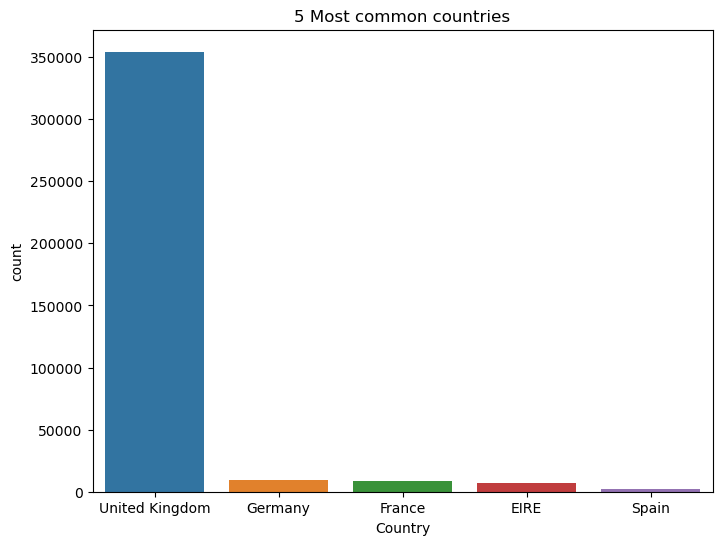

In [18]:
 # 1. Top 5 countries
    
plt.figure(figsize=(8,6))
sns.countplot(x=df['Country'], order=df['Country'].value_counts()[:5].index)
plt.title('5 Most common countries')
plt.show()

The above graph shows the 5 most common countries in the database with United Kingdom having the highest instance

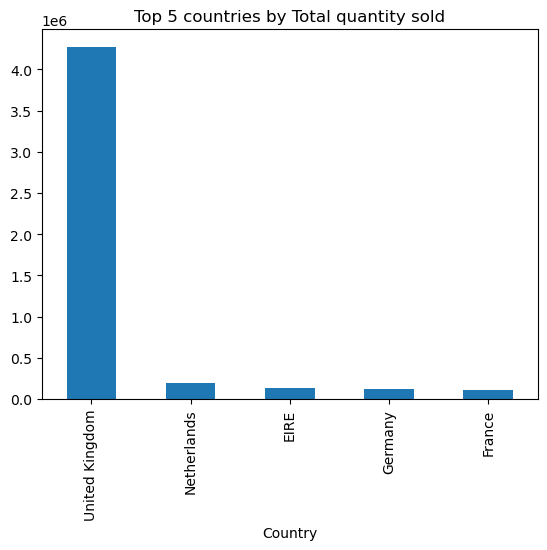

In [19]:
 # 2. Top 5 countries by total quantity sold

df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar', title='Top 5 countries by Total quantity sold')
plt.show()

<Axes: title={'center': 'Top 5 countries by total unit price'}, xlabel='Country'>

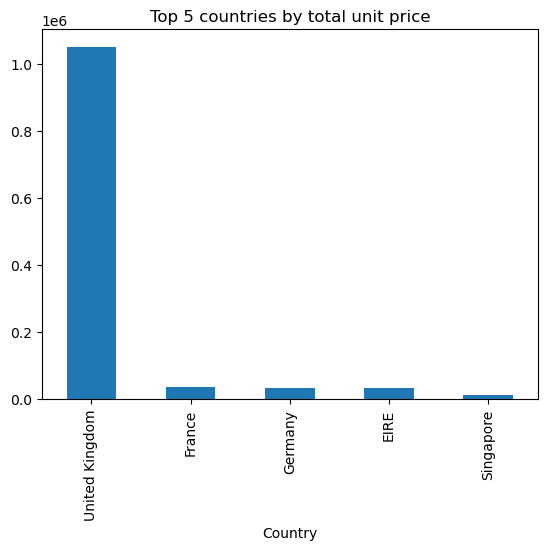

In [20]:
 # 3. Top 5 countries by unit price

df.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False)[:5].plot(kind='bar', title='Top 5 countries by total unit price')

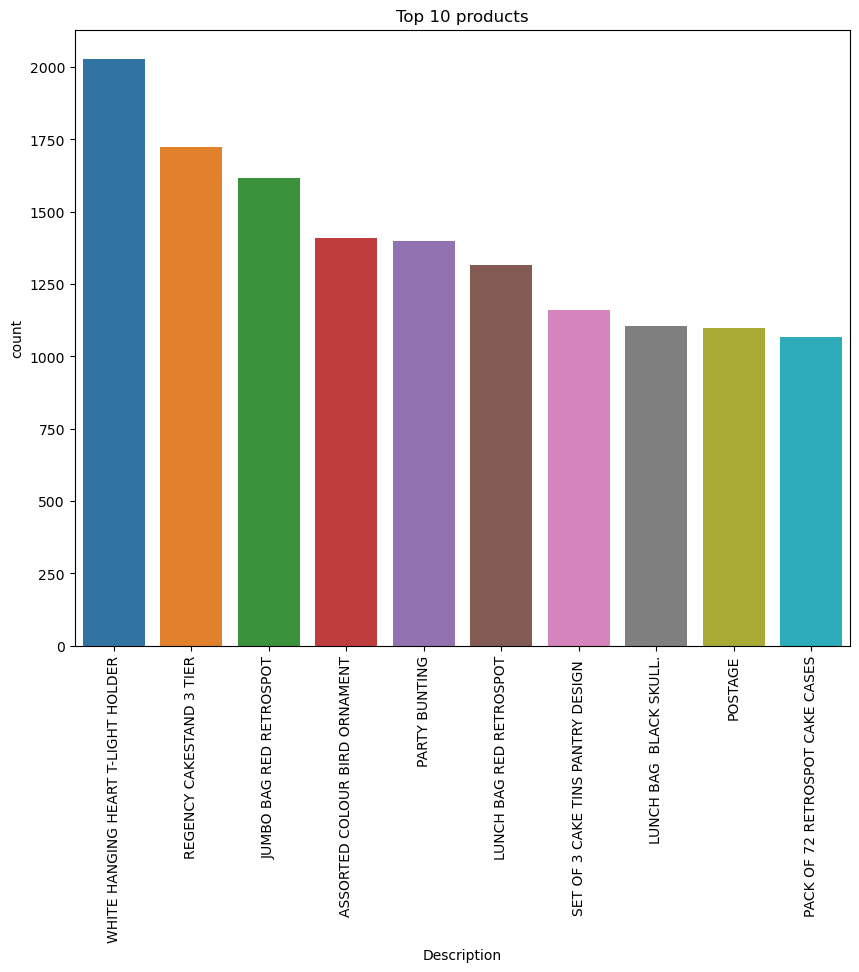

In [21]:
 # 4. Top 10 products purchased

plt.figure(figsize=(10,8))
sns.countplot(x=df['Description'], order=df['Description'].value_counts()[:10].index)
plt.title('Top 10 products')
plt.xticks(rotation=90)
plt.show()

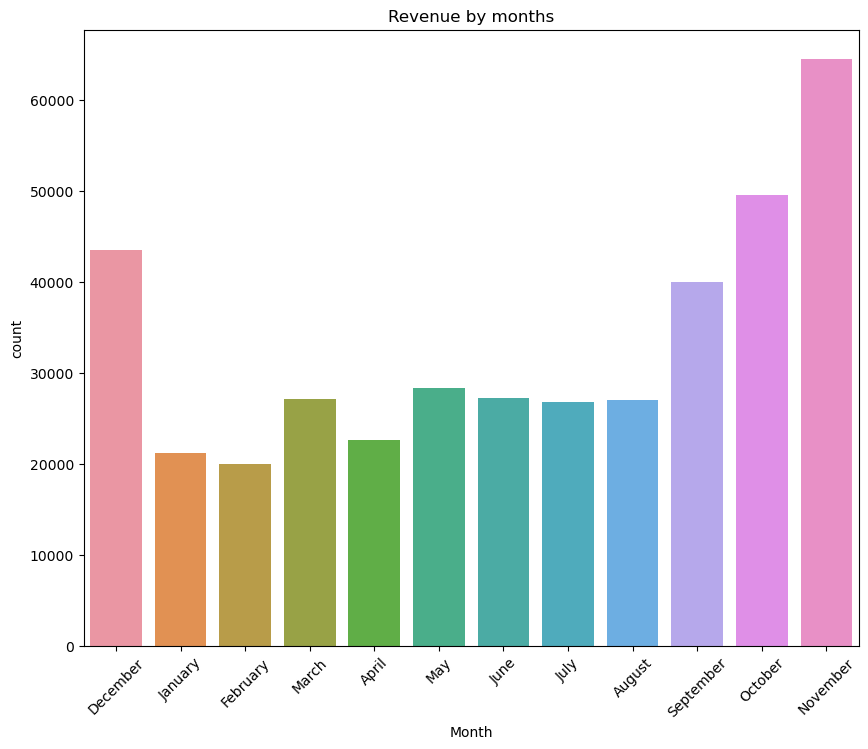

In [22]:
 # 5. Revenue by month
plt.figure(figsize=(10,8))
sns.countplot(x=df['Month'])
plt.title('Revenue by months')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# Apriori Algorithm

In [23]:
# Restricing the data only to UK 

df1 = (df[df['Country']=='United Kingdom'].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
df1.head(5)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Making a function that will return 0 or 1
# 0 indicates the item was not in the transaction and 1 indicates that the item was in the transaction

def encode(i):
    if i<0:
        return 0
    if i>1:
        return 1

In [25]:
df2 = df1.applymap(encode).fillna(0)
df2.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df2.shape

(16649, 3844)

In [27]:
df3 = df2[(df2>0).sum(axis=1)>=2]
df3

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
 # Applying the apriori algorithm
frequent_sets = apriori(df3, min_support=0.02, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_sets 

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.115794,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.087191,(JUMBO BAG RED RETROSPOT)
2,0.084495,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.076736,(PARTY BUNTING)
4,0.066544,(LUNCH BAG RED RETROSPOT)
...,...,...
196,0.020252,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B..."
197,0.020187,(SMALL DOLLY MIX DESIGN ORANGE BOWL)
198,0.020121,(CARD BILLBOARD FONT)
199,0.020121,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."


In [29]:
#Now that we have the frequent sets lets make association rules out of them

rules = association_rules(frequent_sets, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.022554,0.036231,0.020121,0.892128,24.623388,0.019304,8.934400,0.981525
1,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.036231,0.022554,0.020121,0.555354,24.623388,0.019304,2.198256,0.995454
2,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.028340,0.028866,0.020121,0.709977,24.595278,0.019303,3.348469,0.987323
3,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.028866,0.028340,0.020121,0.697039,24.595278,0.019303,3.207207,0.987858
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.028866,0.036231,0.023672,0.820046,22.633853,0.022626,5.355628,0.984230
...,...,...,...,...,...,...,...,...,...,...
57,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.036297,0.115794,0.023277,0.641304,5.538306,0.019074,2.465058,0.850303
58,(PARTY BUNTING),(SPOTTY BUNTING),0.076736,0.053656,0.021042,0.274207,5.110473,0.016924,1.303877,0.871174
59,(SPOTTY BUNTING),(PARTY BUNTING),0.053656,0.076736,0.021042,0.392157,5.110473,0.016924,1.518918,0.849927
60,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.087191,0.066544,0.022357,0.256410,3.853248,0.016555,1.255337,0.811209


In [30]:
# arranging the data on the basis of confidence, highest to lowest

rules.sort_values('confidence', ascending=False, inplace=True)
rules[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.022554,0.036231,0.020121,0.892128,24.623388,0.019304,8.934400,0.981525
6,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.023672,0.040900,0.020121,0.850000,20.782637,0.019153,6.394003,0.974962
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.028866,0.036231,0.023672,0.820046,22.633853,0.022626,5.355628,0.984230
9,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036231,0.040900,0.028340,0.782214,19.125262,0.026859,4.403870,0.983340
11,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.028866,0.040900,0.022554,0.781321,19.103429,0.021373,4.385887,0.975822


Let A be the antecedent and B be the consequent, so association rules explains the association btw the 2. The rule states that if a transaction contains A, it is likely that it will also contain B as we can see from the above, the antecedent is 'ROSES REGENCY TEACUP' and the consequent is 'GREEN REGENCY TEACUP' so when a customer purchases 'ROSES REGENCY TEACUP' there are high probability that the customer would also purchase GREEN REGENCY TEACUP.


In order to understand their relationship better lets take a look at their confidence, support and lift values.
Support - Support explains the proportion of transactions in the given dataset that contains the itemset. Here the support value is 0.02 so 0.02 proportion of transactions contain ROSES REGENCY TEACUP and GREEN REGENCY TEACUP in the dataset.


Confidence - Confidence explains the proportion of transactions that contain the consequents given that they also contain antecedents. Here the confidence value is 0.89 indicating that 89% of the transactions having ROSES REGENCY TEACUP also contain GREEN REGENCY TEACUP.


Lift - Lift measures how much more the consequent appears in the dataset that contain the antecedent compared to what would be expected if they 2 were statistically independent.Here the lift value is 24.62 indicating that consequent is 24 times more likely to be present in the transaction containing the antecendent than if they were 2 independent.